# Linear Programming Fundamentals

This notebook introduces **linear optimization**, the most common type of optimization used in business. You'll learn what makes optimization "linear," why this matters for decision-making, and how to build and solve linear optimization models using Python.

Understanding this is critical because:
- Most business optimization models are linear models
- Linear models assume proportional relationships between inputs and outputs
- Understanding linear optimization helps you interpret most business optimization models correctly
- Linear models are powerful because they can solve large, complex problems efficiently

## Key Concepts

**Linear Optimization** is the most common type of optimization used in business:
- It assumes **proportional relationships**: if you double an input, the output doubles
- If producing 1 unit costs $10, then producing 2 units costs $20, and 3 units costs $30
- The cost per unit stays constant regardless of how many units you produce
- This assumption works well for many business problems

**Maximization vs Minimization**:
- Optimization problems can either **maximize** (make as large as possible) or **minimize** (make as small as possible)
- Maximization: maximize profit, maximize customer satisfaction, maximize efficiency
- Minimization: minimize cost, minimize time, minimize waste
- Both use the same optimization process; only the direction changes

**Linear vs Nonlinear**:
- Linear relationships appear as **straight lines** when graphed
- Nonlinear relationships appear as **curves** (diminishing returns, economies of scale)
- Most real-world relationships have some nonlinearity, but linear models often approximate them well enough

**Critical insight**: Linear optimization finds the best solution when relationships are proportional. It works well when costs, capacities, and other factors scale proportionally.

## Scenario: Production Planning

You manage a factory that produces two products: Product A and Product B. You need to decide how many units of each to produce next month.

**Decision variables**: How many units of Product A and Product B to produce

**Objective**: Maximize total profit

**Constraints**:
- Production capacity: 2,000 total units
- Labor hours: 1,500 hours available
- Product A requires 0.5 hours per unit
- Product B requires 0.8 hours per unit
- Demand limits: Cannot exceed forecasted demand (1,200 units for A, 1,000 units for B)

**The linearity assumption**: If Product A costs $10 per unit to produce and generates $25 profit per unit, then producing 10 units generates $250 profit, and producing 20 units generates $500 profit (exactly double). This proportional relationship makes it a linear optimization problem.

## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.

In [21]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpMinimize, LpProblem, LpVariable, lpSum, value,  PULP_CBC_CMD

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

## Step 3: Define the Problem Parameters

Let's set up our production planning problem with specific parameter values. Notice how each parameter represents a proportional relationship:

In [23]:
# Problem inputs (parameters)
profit_A = 50  # Profit per unit of Product A ($)
profit_B = 40  # Profit per unit of Product B ($)

# Capacity constraints
capacity = 2000  # Total production capacity (units)
labor_hours = 1500  # Available labor hours
labor_per_A = 0.5  # Labor hours per unit of A
labor_per_B = 0.8  # Labor hours per unit of B

# Demand limits
demand_A = 1200  # Maximum demand for Product A
demand_B = 1000  # Maximum demand for Product B

print("PROBLEM SETUP:")
print(f"  Profit per A: ${profit_A}")
print(f"  Profit per B: ${profit_B}")
print(f"  Capacity: {capacity} units")
print(f"  Labor hours: {labor_hours} hours")
print(f"  Demand A: {demand_A} units")
print(f"  Demand B: {demand_B} units")

PROBLEM SETUP:
  Profit per A: $50
  Profit per B: $40
  Capacity: 2000 units
  Labor hours: 1500 hours
  Demand A: 1200 units
  Demand B: 1000 units


## Step 4: Demonstrate Proportional Relationships

Let's visualize what makes this a **linear** problem - the proportional relationship:

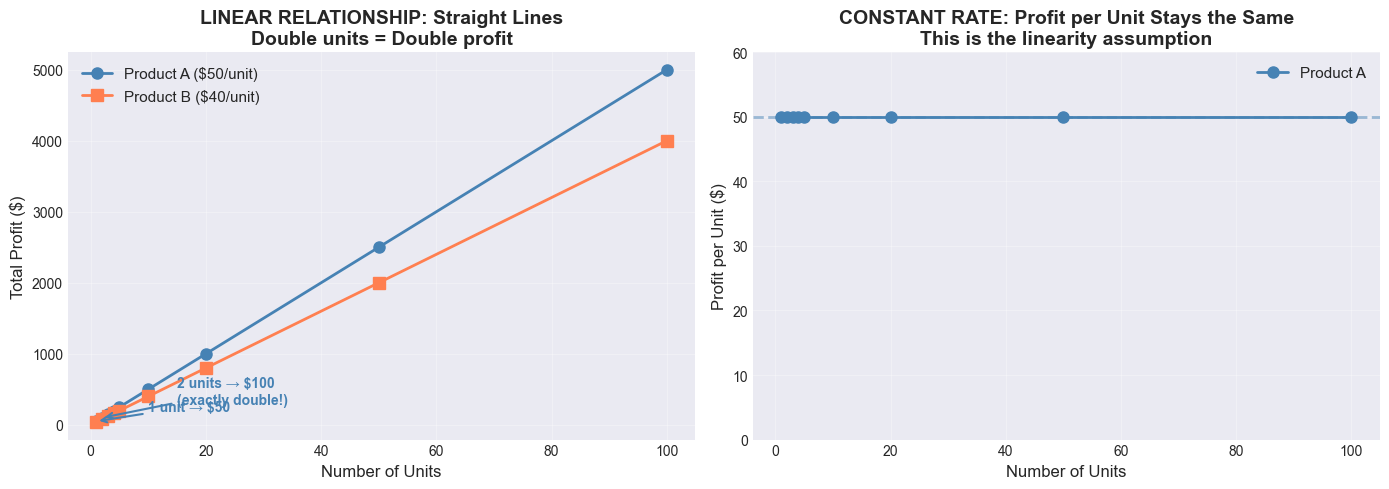


KEY INSIGHT:
  - Linear relationships show as STRAIGHT LINES
  - Profit per unit stays CONSTANT (no bulk discounts, no volume penalties)
  - If you double production, profit doubles exactly
  - This proportional relationship is what makes it 'linear'


In [24]:
# Demonstrate proportional relationships
units = np.array([1, 2, 3, 4, 5, 10, 20, 50, 100])
profit_A_total = units * profit_A
profit_B_total = units * profit_B

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Profit vs Units (straight line = linear)
ax1 = axes[0]
ax1.plot(units, profit_A_total, 'o-', linewidth=2, markersize=8, label='Product A ($50/unit)', color='steelblue')
ax1.plot(units, profit_B_total, 's-', linewidth=2, markersize=8, label='Product B ($40/unit)', color='coral')
ax1.set_xlabel('Number of Units', fontsize=12)
ax1.set_ylabel('Total Profit ($)', fontsize=12)
ax1.set_title('LINEAR RELATIONSHIP: Straight Lines\nDouble units = Double profit', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Add annotations showing proportionality
ax1.annotate('1 unit → $50', xy=(1, 50), xytext=(10, 200), 
             arrowprops=dict(arrowstyle='->', color='steelblue', lw=1.5),
             fontsize=10, color='steelblue', fontweight='bold')
ax1.annotate('2 units → $100\n(exactly double!)', xy=(2, 100), xytext=(15, 300),
             arrowprops=dict(arrowstyle='->', color='steelblue', lw=1.5),
             fontsize=10, color='steelblue', fontweight='bold')

# Plot 2: Profit per unit (constant = linear)
ax2 = axes[1]
profit_per_unit_A = np.full(len(units), profit_A)  # Constant profit per unit
ax2.plot(units, profit_per_unit_A, 'o-', linewidth=2, markersize=8, label='Product A', color='steelblue')
ax2.axhline(y=profit_A, color='steelblue', linestyle='--', alpha=0.5, linewidth=2)
ax2.set_xlabel('Number of Units', fontsize=12)
ax2.set_ylabel('Profit per Unit ($)', fontsize=12)
ax2.set_title('CONSTANT RATE: Profit per Unit Stays the Same\nThis is the linearity assumption', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 60])

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("  - Linear relationships show as STRAIGHT LINES")
print("  - Profit per unit stays CONSTANT (no bulk discounts, no volume penalties)")
print("  - If you double production, profit doubles exactly")
print("  - This proportional relationship is what makes it 'linear'")

## Step 5: Build and Solve the Linear Optimization Model

Now let's build the optimization model using PuLP. Notice how all relationships are linear (proportional):

In [25]:
# Create the optimization model
model = LpProblem("Production_Planning", LpMaximize)

# Decision variables (what we control)
produce_A = LpVariable("Produce_A", lowBound=0, cat='Continuous')
produce_B = LpVariable("Produce_B", lowBound=0, cat='Continuous')

# Objective: Maximize profit (LINEAR: profit_A * produce_A + profit_B * produce_B)
model += profit_A * produce_A + profit_B * produce_B, "Total_Profit"

# Constraints (all LINEAR relationships)
model += produce_A + produce_B <= capacity, "Capacity_Constraint"
model += labor_per_A * produce_A + labor_per_B * produce_B <= labor_hours, "Labor_Constraint"
model += produce_A <= demand_A, "Demand_A_Constraint"
model += produce_B <= demand_B, "Demand_B_Constraint"

# Solve the model
model.solve(PULP_CBC_CMD(msg=0))  # msg=0 suppresses solver output

# Get results
solution_A = value(produce_A)
solution_B = value(produce_B)
total_profit = value(model.objective)

print("OPTIMIZATION RESULTS:")
print(f"  Produce {solution_A:.0f} units of Product A")
print(f"  Produce {solution_B:.0f} units of Product B")
print(f"  Total Profit: ${total_profit:,.0f}")
print(f"\nStatus: {model.status}")
print(f"  Status 1 = Optimal solution found")

OPTIMIZATION RESULTS:
  Produce 1200 units of Product A
  Produce 800 units of Product B
  Total Profit: $92,000

Status: 1
  Status 1 = Optimal solution found


## Step 6: Visualize Linear vs Nonlinear Relationships

Let's compare linear relationships (straight lines) with nonlinear relationships (curves) to understand when linear models are appropriate:

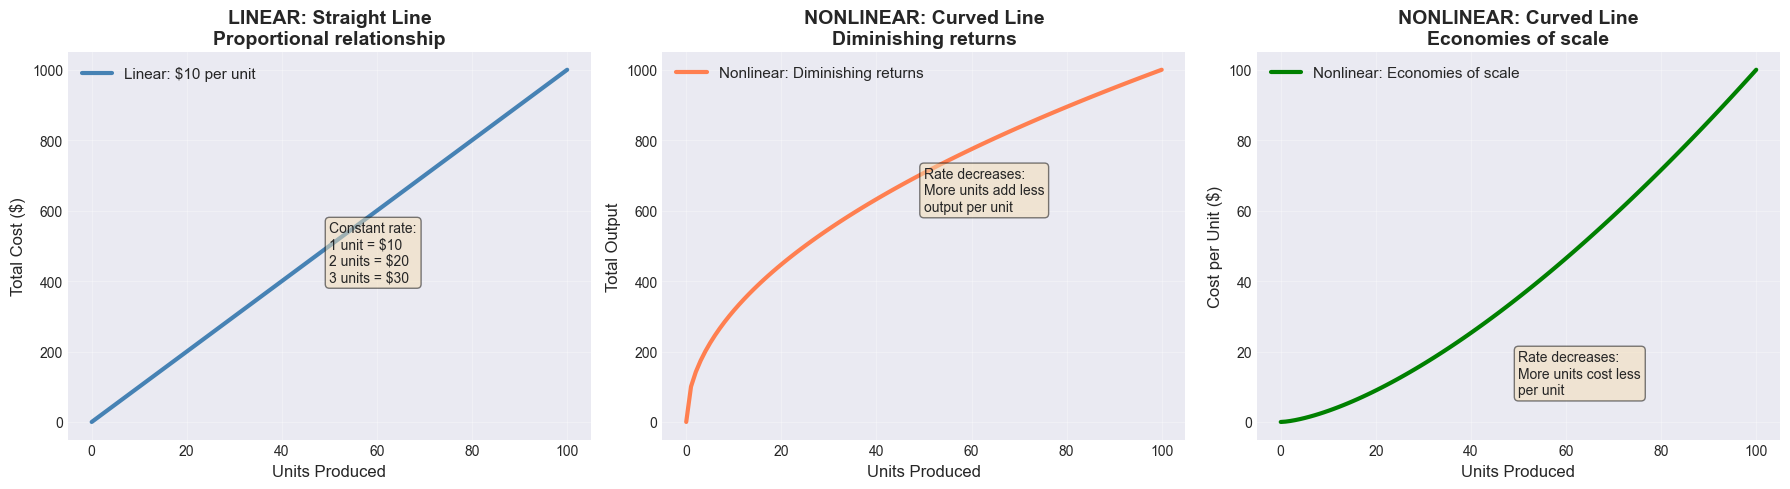


KEY INSIGHT:
  - LINEAR = Straight line = Proportional (double input = double output)
  - NONLINEAR = Curved line = Not proportional
  - Linear models work well when relationships are approximately proportional
  - Most business problems can be approximated well with linear models


In [26]:
# Create comparison of linear vs nonlinear
x = np.linspace(0, 100, 100)

# Linear relationship (straight line)
linear = 10 * x  # $10 per unit, constant rate

# Nonlinear relationships (curves)
diminishing_returns = 100 * np.sqrt(x)  # Diminishing returns (curves upward but flattens)
economies_of_scale = 0.1 * x**1.5  # Economies of scale (curves downward)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Linear (straight line)
ax1 = axes[0]
ax1.plot(x, linear, linewidth=3, color='steelblue', label='Linear: $10 per unit')
ax1.set_xlabel('Units Produced', fontsize=12)
ax1.set_ylabel('Total Cost ($)', fontsize=12)
ax1.set_title('LINEAR: Straight Line\nProportional relationship', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.text(50, 400, 'Constant rate:\n1 unit = $10\n2 units = $20\n3 units = $30', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: Diminishing returns (nonlinear)
ax2 = axes[1]
ax2.plot(x, diminishing_returns, linewidth=3, color='coral', label='Nonlinear: Diminishing returns')
ax2.set_xlabel('Units Produced', fontsize=12)
ax2.set_ylabel('Total Output', fontsize=12)
ax2.set_title('NONLINEAR: Curved Line\nDiminishing returns', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.text(50, 600, 'Rate decreases:\nMore units add less\noutput per unit', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 3: Economies of scale (nonlinear)
ax3 = axes[2]
ax3.plot(x, economies_of_scale, linewidth=3, color='green', label='Nonlinear: Economies of scale')
ax3.set_xlabel('Units Produced', fontsize=12)
ax3.set_ylabel('Cost per Unit ($)', fontsize=12)
ax3.set_title('NONLINEAR: Curved Line\nEconomies of scale', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.text(50, 8, 'Rate decreases:\nMore units cost less\nper unit', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT:")
print("  - LINEAR = Straight line = Proportional (double input = double output)")
print("  - NONLINEAR = Curved line = Not proportional")
print("  - Linear models work well when relationships are approximately proportional")
print("  - Most business problems can be approximated well with linear models")

## Step 7: Maximization vs Minimization

The same optimization process works for both maximization and minimization. Let's demonstrate both:

In [27]:
# Example 1: MAXIMIZATION (maximize profit)
model_max = LpProblem("Maximize_Profit", LpMaximize)
produce_A_max = LpVariable("Produce_A", lowBound=0, cat='Continuous')
produce_B_max = LpVariable("Produce_B", lowBound=0, cat='Continuous')

model_max += profit_A * produce_A_max + profit_B * produce_B_max, "Total_Profit"
model_max += produce_A_max + produce_B_max <= capacity, "Capacity"
model_max += labor_per_A * produce_A_max + labor_per_B * produce_B_max <= labor_hours, "Labor"
model_max += produce_A_max <= demand_A, "Demand_A"
model_max += produce_B_max <= demand_B, "Demand_B"

model_max.solve(PULP_CBC_CMD(msg=0))  # msg=0 suppresses solver output
profit_max = value(model_max.objective)

# Example 2: MINIMIZATION (minimize cost)
# Assume costs: $30 per unit A, $25 per unit B
cost_A = 30
cost_B = 25

model_min = LpProblem("Minimize_Cost", LpMinimize)
produce_A_min = LpVariable("Produce_A", lowBound=0, cat='Continuous')
produce_B_min = LpVariable("Produce_B", lowBound=0, cat='Continuous')

model_min += cost_A * produce_A_min + cost_B * produce_B_min, "Total_Cost"
model_min += produce_A_min + produce_B_min <= capacity, "Capacity"
model_min += labor_per_A * produce_A_min + labor_per_B * produce_B_min <= labor_hours, "Labor"
model_min += produce_A_min <= demand_A, "Demand_A"
model_min += produce_B_min <= demand_B, "Demand_B"

model_min.solve(PULP_CBC_CMD(msg=0))  # msg=0 suppresses solver output
cost_min = value(model_min.objective)

print("MAXIMIZATION vs MINIMIZATION:")
print(f"\n1. MAXIMIZE PROFIT:")
print(f"   Produce {value(produce_A_max):.0f} units of A, {value(produce_B_max):.0f} units of B")
print(f"   Maximum Profit: ${profit_max:,.0f}")
print(f"\n2. MINIMIZE COST:")
print(f"   Produce {value(produce_A_min):.0f} units of A, {value(produce_B_min):.0f} units of B")
print(f"   Minimum Cost: ${cost_min:,.0f}")
print(f"\nKEY INSIGHT:")
print(f"   - Both use the SAME optimization process")
print(f"   - Only the DIRECTION changes (maximize vs minimize)")
print(f"   - Maximization finds the HIGHEST value")
print(f"   - Minimization finds the LOWEST value")

MAXIMIZATION vs MINIMIZATION:

1. MAXIMIZE PROFIT:
   Produce 1200 units of A, 800 units of B
   Maximum Profit: $92,000

2. MINIMIZE COST:
   Produce 0 units of A, 0 units of B
   Minimum Cost: $0

KEY INSIGHT:
   - Both use the SAME optimization process
   - Only the DIRECTION changes (maximize vs minimize)
   - Maximization finds the HIGHEST value
   - Minimization finds the LOWEST value


## Step 8: Interpreting Linear Optimization Results

When you solve a linear optimization model, you get specific recommendations. Let's understand what these results mean:

In [28]:
# Get detailed results from our maximization model
print("INTERPRETING LINEAR OPTIMIZATION RESULTS:\n")
print("=" * 60)
print("\n1. DECISION VARIABLES (What to produce?):")
print(f"   Product A: {solution_A:.0f} units")
print(f"   Product B: {solution_B:.0f} units")
print(f"   \n   These are the specific values the model recommends.")

print("\n2. OBJECTIVE VALUE (What's the profit?):")
print(f"   Total Profit: ${total_profit:,.0f}")
print(f"   \n   This is the best profit achievable given constraints.")

print("\n3. CONSTRAINT SATISFACTION (Are constraints met?):")
# Check each constraint
capacity_used = solution_A + solution_B
labor_used = labor_per_A * solution_A + labor_per_B * solution_B

print(f"   Capacity: {capacity_used:.0f} / {capacity} units ({(capacity_used/capacity)*100:.1f}% used)")
print(f"   Labor: {labor_used:.1f} / {labor_hours} hours ({(labor_used/labor_hours)*100:.1f}% used)")
print(f"   Demand A: {solution_A:.0f} / {demand_A} units")
print(f"   Demand B: {solution_B:.0f} / {demand_B} units")
print(f"   \n   All constraints are satisfied (feasible solution).")

print("\n4. ASSUMPTIONS:")
print(f"   - Assumes proportional relationships (linear)")
print(f"   - Assumes parameters (costs, capacities) are accurate")
print(f"   - Assumes constraints won't change")
print(f"   \n   If assumptions don't hold, the optimal solution may not be optimal in reality.")

print("\n" + "=" * 60)

INTERPRETING LINEAR OPTIMIZATION RESULTS:


1. DECISION VARIABLES (What to produce?):
   Product A: 1200 units
   Product B: 800 units
   
   These are the specific values the model recommends.

2. OBJECTIVE VALUE (What's the profit?):
   Total Profit: $92,000
   
   This is the best profit achievable given constraints.

3. CONSTRAINT SATISFACTION (Are constraints met?):
   Capacity: 2000 / 2000 units (100.0% used)
   Labor: 1240.0 / 1500 hours (82.7% used)
   Demand A: 1200 / 1200 units
   Demand B: 800 / 1000 units
   
   All constraints are satisfied (feasible solution).

4. ASSUMPTIONS:
   - Assumes proportional relationships (linear)
   - Assumes parameters (costs, capacities) are accurate
   - Assumes constraints won't change
   
   If assumptions don't hold, the optimal solution may not be optimal in reality.



## Step 9: Business Applications of Linear Optimization

Linear optimization is used throughout business for many types of decisions. Let's see some examples:

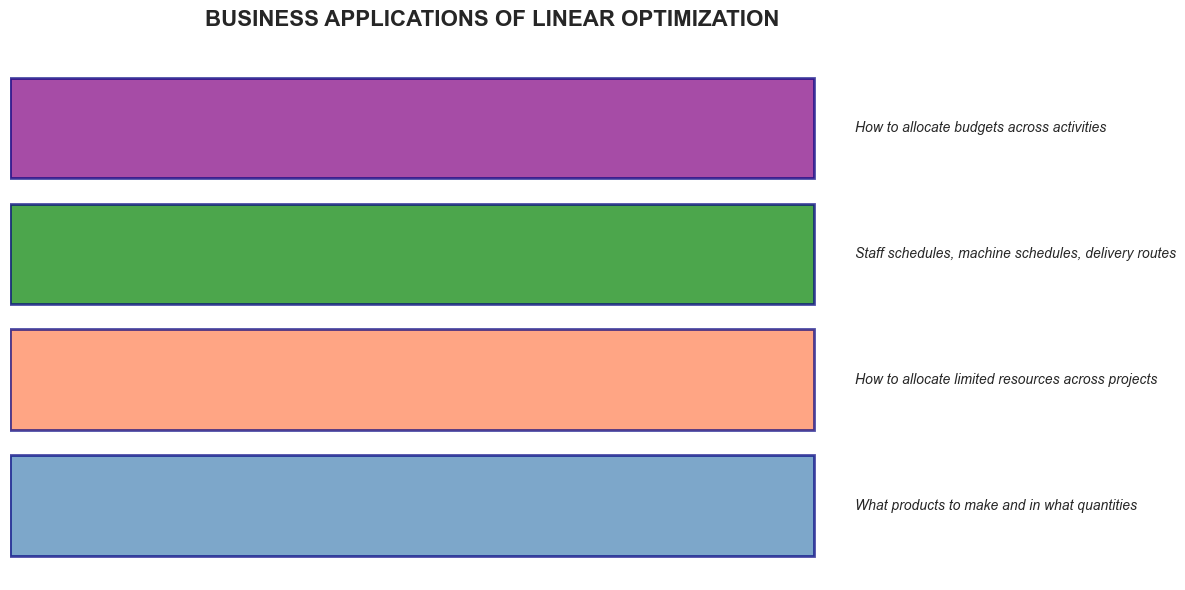


COMMON CHARACTERISTICS:
  ✓ Allocating limited resources (time, money, capacity)
  ✓ Relationships are approximately proportional
  ✓ Clear objectives (maximize profit, minimize cost)
  ✓ Well-defined constraints (budget limits, capacity limits)

WHY LINEAR OPTIMIZATION WORKS:
  • Fast and reliable for large problems
  • Widely accessible optimization software
  • Works well for many business problems
  • Can solve problems with thousands of variables and constraints


In [29]:
# Create a visualization of business applications
applications = {
    'Production Planning': 'What products to make and in what quantities',
    'Resource Allocation': 'How to allocate limited resources across projects',
    'Scheduling': 'Staff schedules, machine schedules, delivery routes',
    'Budget Allocation': 'How to allocate budgets across activities'
}

fig, ax = plt.subplots(figsize=(12, 6))
y_pos = np.arange(len(applications))
colors = ['steelblue', 'coral', 'green', 'purple']

bars = ax.barh(y_pos, [1]*len(applications), color=colors, alpha=0.7, edgecolor='navy', linewidth=2)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(applications.keys()), fontsize=12, fontweight='bold')
ax.set_xlabel('All Use Linear Optimization', fontsize=12)
ax.set_title('BUSINESS APPLICATIONS OF LINEAR OPTIMIZATION', fontsize=16, fontweight='bold', pad=20)
ax.set_xlim([0, 1.2])

# Add descriptions
for i, (app, desc) in enumerate(applications.items()):
    ax.text(1.05, i, desc, fontsize=10, va='center', style='italic')

ax.axis('off')
plt.tight_layout()
plt.show()

print("\nCOMMON CHARACTERISTICS:")
print("  ✓ Allocating limited resources (time, money, capacity)")
print("  ✓ Relationships are approximately proportional")
print("  ✓ Clear objectives (maximize profit, minimize cost)")
print("  ✓ Well-defined constraints (budget limits, capacity limits)")
print("\nWHY LINEAR OPTIMIZATION WORKS:")
print("  • Fast and reliable for large problems")
print("  • Widely accessible optimization software")
print("  • Works well for many business problems")
print("  • Can solve problems with thousands of variables and constraints")

## Step 10: Visualizing the Solution

Let's create a visual summary of our optimization problem and solution:

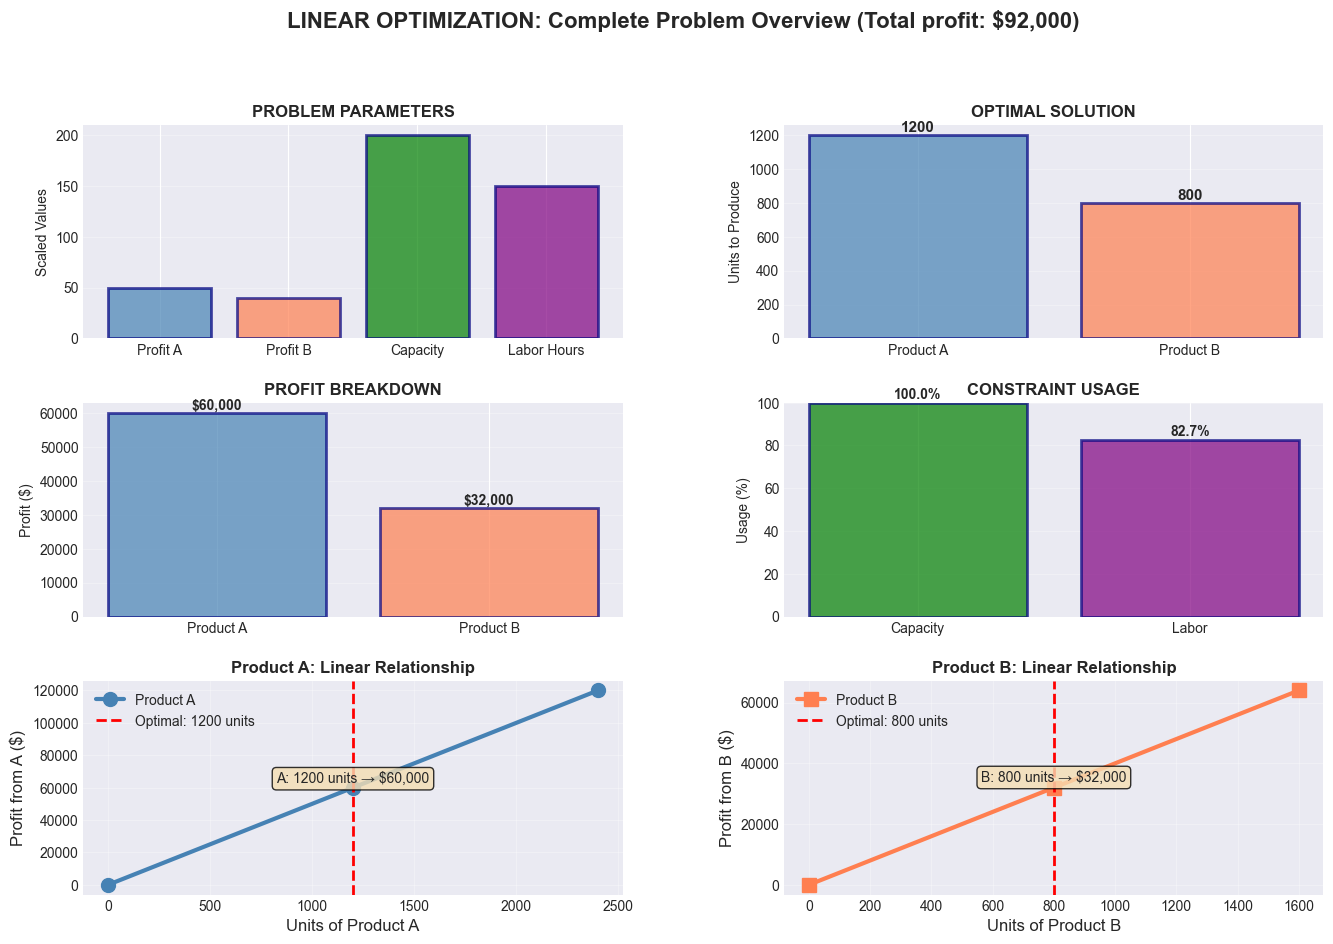


SUMMARY:
  • Optimal production: 1200 units A, 800 units B
  • Maximum profit: $92,000
  • Capacity usage: 100.0%
  • Labor usage: 82.7%


In [30]:
# Create a comprehensive visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Problem setup
ax1 = fig.add_subplot(gs[0, 0])
categories = ['Profit A', 'Profit B', 'Capacity', 'Labor Hours']
values = [profit_A, profit_B, capacity/10, labor_hours/10]  # Scale for visualization
colors = ['steelblue', 'coral', 'green', 'purple']
bars = ax1.bar(categories, values, color=colors, alpha=0.7, edgecolor='navy', linewidth=2)
ax1.set_title('PROBLEM PARAMETERS', fontsize=12, fontweight='bold')
ax1.set_ylabel('Scaled Values')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Solution
ax2 = fig.add_subplot(gs[0, 1])
products = ['Product A', 'Product B']
quantities = [solution_A, solution_B]
bars = ax2.bar(products, quantities, color=['steelblue', 'coral'], alpha=0.7, edgecolor='navy', linewidth=2)
ax2.set_title('OPTIMAL SOLUTION', fontsize=12, fontweight='bold')
ax2.set_ylabel('Units to Produce')
ax2.grid(axis='y', alpha=0.3)
for i, (prod, qty) in enumerate(zip(products, quantities)):
    ax2.text(i, qty + 20, f'{qty:.0f}', ha='center', fontsize=11, fontweight='bold')

# Plot 3: Profit breakdown
ax3 = fig.add_subplot(gs[1, 0])
profit_A_total = solution_A * profit_A
profit_B_total = solution_B * profit_B
profits = [profit_A_total, profit_B_total]
bars = ax3.bar(products, profits, color=['steelblue', 'coral'], alpha=0.7, edgecolor='navy', linewidth=2)
ax3.set_title('PROFIT BREAKDOWN', fontsize=12, fontweight='bold')
ax3.set_ylabel('Profit ($)')
ax3.grid(axis='y', alpha=0.3)
for i, (prod, prof) in enumerate(zip(products, profits)):
    ax3.text(i, prof + 1000, f'${prof:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Plot 4: Constraint usage
ax4 = fig.add_subplot(gs[1, 1])
constraints = ['Capacity', 'Labor']
used = [capacity_used, labor_used]
available = [capacity, labor_hours]
usage_pct = [(u/a)*100 for u, a in zip(used, available)]
bars = ax4.bar(constraints, usage_pct, color=['green', 'purple'], alpha=0.7, edgecolor='navy', linewidth=2)
ax4.set_title('CONSTRAINT USAGE', fontsize=12, fontweight='bold')
ax4.set_ylabel('Usage (%)')
ax4.set_ylim([0, 100])
ax4.grid(axis='y', alpha=0.3)
for i, (const, pct) in enumerate(zip(constraints, usage_pct)):
    ax4.text(i, pct + 2, f'{pct:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Plot 5: Linear relationship - Product A
ax5 = fig.add_subplot(gs[2, 0])
units_range_A = np.array([0, solution_A, solution_A * 2])
profit_range_A = units_range_A * profit_A
ax5.plot(units_range_A, profit_range_A, 'o-', linewidth=3, markersize=10, color='steelblue', label='Product A')
ax5.axvline(x=solution_A, color='red', linestyle='--', linewidth=2, label=f'Optimal: {solution_A:.0f} units')
ax5.set_xlabel('Units of Product A', fontsize=12)
ax5.set_ylabel('Profit from A ($)', fontsize=12)
ax5.set_title('Product A: Linear Relationship', fontsize=12, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)
ax5.text(solution_A, profit_range_A[1] + 3000, f'A: {solution_A:.0f} units → ${profit_range_A[1]:,.0f}', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), ha='center')

# Plot 6: Linear relationship - Product B
ax6 = fig.add_subplot(gs[2, 1])
units_range_B = np.array([0, solution_B, solution_B * 2])
profit_range_B = units_range_B * profit_B
ax6.plot(units_range_B, profit_range_B, 's-', linewidth=3, markersize=10, color='coral', label='Product B')
ax6.axvline(x=solution_B, color='red', linestyle='--', linewidth=2, label=f'Optimal: {solution_B:.0f} units')
ax6.set_xlabel('Units of Product B', fontsize=12)
ax6.set_ylabel('Profit from B ($)', fontsize=12)
ax6.set_title('Product B: Linear Relationship', fontsize=12, fontweight='bold')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)
ax6.text(solution_B, profit_range_B[1] + 2000, f'B: {solution_B:.0f} units → ${profit_range_B[1]:,.0f}', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), ha='center')

plt.suptitle(f'LINEAR OPTIMIZATION: Complete Problem Overview (Total profit: ${total_profit:,.0f})', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print(f"\nSUMMARY:")
print(f"  • Optimal production: {solution_A:.0f} units A, {solution_B:.0f} units B")
print(f"  • Maximum profit: ${total_profit:,.0f}")
print(f"  • Capacity usage: {(capacity_used/capacity)*100:.1f}%")
print(f"  • Labor usage: {(labor_used/labor_hours)*100:.1f}%")

## Key Takeaways

**Linear Optimization Fundamentals:**

1. **What is Linear Optimization?**
   - Most common type of optimization in business
   - Assumes proportional relationships (double input = double output)
   - Works well for many business problems

2. **The Linearity Assumption:**
   - Cost per unit stays constant (no economies or diseconomies of scale)
   - Relationships appear as straight lines when graphed
   - If producing 1 unit costs $10, then 2 units cost $20, 3 units cost $30

3. **Linear vs Nonlinear:**
   - Linear = straight line = proportional
   - Nonlinear = curved line = not proportional
   - Linear models often approximate real-world relationships well enough

4. **Maximization and Minimization:**
   - Both use the same optimization process
   - Maximization seeks highest value (profit, satisfaction, efficiency)
   - Minimization seeks lowest value (cost, time, waste)

5. **Interpreting Results:**
   - Decision variables: what to produce/do
   - Objective value: best profit/cost achievable
   - Constraints: all must be satisfied
   - Assumptions: results assume linear relationships and accurate parameters

6. **Business Applications:**
   - Production planning, resource allocation, scheduling, budget allocation
   - All involve proportional relationships and clear constraints
   - Linear optimization is fast, reliable, and widely accessible

**Critical Insight**: Linear optimization finds the best solution when relationships are proportional. Understanding this helps you recognize when linear models are appropriate and how to interpret their results correctly.